# Grade: /100 pts

# Assignment 7: Tree methods

In this assignment you'll study tree methods. You will use a dataset that contains the premier league (soccer) matches between 2010 and 2021. The data has the following variables:

|#|Attribute|Description|
|---|---|---|
|0|home_team|home team|
|1|away_team|away team|
|2|result_full|match result|
|3|home_clearances|home team clearances in the match|
|4|home_corners|home team corners in the match|
|5|home_fouls_conceded|home team fouls conceded in the match|
|6|home_offsides|home team offsides in the match|
|7|home_passes|home team passes in the match|
|8|home_possession|home team possession in the match|
|9|home_red_cards|home team red cards in the match|
|10|home_shots|home team shots in the match|
|11|home_shots_on_target|home team shots on target in the match|
|12|home_tackles|home team tackles in the match|
|13|home_touches|home team touches in the match|
|14|home_yellow_cards|home team yellow cards in the match|
|15|away_clearances|away tem clearances in the match|
|16|away_corners|away team corners in the match|
|17|away_fouls_concedevd|away team fouls conceded in the match|
|18|away_offsides|away team offsides in the match|
|19|away_passes|away team passes in the match|
|20|away_possession|away team possession in the match|
|21|away_red_cards|away team red cards in the match|
|22|away_shots|away team shots in the match|
|23|away_shots_on_target|away team shots on target in the match|
|24|away_tackles|away team tackles in the match|
|25|away_touches|away team touches in the match|
|26|away_yellow_cards|away team yellow cards in the match|
|27|clearances_avg_home|average home team clearances in the season; accumulated until the last match|
|28|corners_avg_home|average home team corners in the season; accumulated until the last match|
|29|fouls_conceded_avg_home|average home team fouls conceded in the season; accumulated until the last match|
|30|offsides_avg_home|average home team offsides in the season; accumulated until the last match|
|31|passes_avg_home|average home team passes in the season; accumulated until the last match|
|32|possession_avg_home|average home team possession in the season; accumulated until the last match|
|33|red_cards_avg_home|average home team red cards in the season; accumulated until the last match|
|34|shots_on_target_avg_home|average home team shots on target in the season; accumulated until the last match|
|35|tackles_avg_home|average home team tackles in the season; accumulated until the last match|
|36|touches_avg_home|average home team touches in the season; accumulated until the last match|
|37|yellow_cards_avg_home|average home team yellow cards in the season; accumulated until the last match|
|38|goals_scored_ft_avg_home|average home team goals scored in the season; accumulated until the last match|
|39|goals_conced_ft_avg_home|average home team goals conceded in the season; accumulated until the last match|
|40|sg_match_ft_acum_home|goals difference in the season; accumulated until the last match|
|41|goals_scored_ht_avg_home|average home team goals scored in 1st time in the season; accumulated until the last match|
|42|goals_conced_ht_avg_home|average home team goals conceded in 1st time in the season; accumulated until the last match|
|43|clearances_avg_away|average away team clearances in the season; accumulated until the last match|
|44|corners_avg_away|average away team corners in the season; accumulated until the last match|
|45|fouls_conceded_avg_away|average away team fouls conceded in the season; accumulated until the last match|
|46|offsides_avg_away|average away team offsides in the season; accumulated until the last match|
|47|passes_avg_away|average away team passes in the season; accumulated until the last match|
|48|possession_avg_away|average away team possession in the season; accumulated until the last match|
|49|red_cards_avg_away|average away team red cards in the season; accumulated until the last match|
|50|shots_on_target_avg_away|average away team shots on target in the season; accumulated until the last match|
|51|tackles_avg_away|average away team tackles in the season; accumulated until the last match|
|52|touches_avg_away|average away team touches in the season; accumulated until the last match|
|53|yellow_cards_avg_away|average away team yellow cards in the season; accumulated until the last match|
|54|goals_scored_ft_avg_away|average away team goals scored in the season; accumulated until the last match|
|55|goals_conced_ft_avg_away|average away team goals conceded in the season; accumulated until the last match|
|56|sg_match_ft_acum_away|goals difference in the season; accumulated until the last match|
|57|goals_scored_ht_avg_away|average away team goals scored in 1st time in the season; accumulated until the last match|
|58|goals_conced_ht_avg_away|average away team goals conceded in 1st time in the season; accumulated until the last match|

*Do not forget to include labels in your figures.*

*Take advantage of `n_jobs=-1` where applicable.*

### <span style="color:yellow"> Global Toolbox </span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk 
from sklearn.model_selection import  train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

import pydotplus 
from sklearn.tree import export_graphviz
from IPython.display import Image

import warnings; warnings.filterwarnings('ignore')
seed = 310
np.random.seed(seed)

### Q1.1 - <span style="color:red">[4]</span> - Load and clean the dataset:

1. Load the dataset.
2. Drop all the variables that you would not have known prior to the match, except for the goals.
3. Store the shape of the dataframe in a variable called <span style="color:pink">**shape_vector**</span>.

**Points will be deducted if your answer is not in the variable mentioned above**

In [2]:
df = pd.read_csv("PL_matches.csv")
df.drop(df.iloc[:, 3:27], inplace=True, axis=1) #drop from 3 to 27
shape_vector = df.shape
#easier to get goals, delete result col and make col for each team
out_arr = np.char.split(df["result_full"].values.astype(str), sep='-', maxsplit=1)
df["home_team_goals"] = [int(arr[0]) for arr in out_arr]
df["away_team_goals"] = [int(arr[1]) for arr in out_arr]
df = df.drop("result_full", axis=1) 
df.head()

,home_team,away_team,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,shots_on_target_avg_home,...,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,home_team_goals,away_team_goals
0,Blackpool,West Bromwich Albion,38.4,4.6,11.3,3.4,407.9,48.3,0.1,4.4,...,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,2,1
1,Liverpool,Manchester City,29.8,5.6,12.3,2.2,440.1,52.7,0.1,5.3,...,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32,3,0
2,Manchester United,Arsenal,29.1,6.1,10.8,2.9,517.3,57.6,0.0,5.6,...,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38,1,0
3,Stoke City,Aston Villa,32.3,4.0,13.7,2.0,256.0,35.7,0.0,4.0,...,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,2,1
4,Fulham,Chelsea,38.7,5.0,12.1,2.9,446.8,51.6,0.0,4.5,...,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48,0,0


### Q1.2 - <span style="color:red">[10]</span> - Create the target variable:

1. Create a new variable (column) in the dataset called "target", which will be the target for our classification. This variable will be "0" if the home team scored more goals than away team, "1" if the away scored more, and "2" if they scored the same number of goals. 
2. In which game was the greatest goal difference? What was the result of the game? Store the home team of the game in **home_team**, away in **away_team** and result in **game_result**.
3. Drop all variables related to the  result of the game including the name of the teams, except for the target.
4. **Written question:** Is this dataset balanced? Why? Write no more than 2 lines.

**Hint:** To create the target variable you should use the split function from pandas. Take a look to the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html).


**Points will be deducted if your answer is not in the variable names mentioned above.**

In [3]:
#make 0 if home>away goals, else, 1 if smaller, 2 otherwise(equal)
df["target"] = np.where(df.home_team_goals>df.away_team_goals,
                        0, np.where(df.home_team_goals < df.away_team_goals, 1, 2)) 

#get greatest goal difference
greatest_goal_diff = max(abs(df['home_team_goals'] - df['away_team_goals']))
#find greatest goal difference in dataset
df2 = df[df["home_team_goals"] - df['away_team_goals'] == greatest_goal_diff]
home_team = df2.home_team.values[0]
away_team = df2.away_team.values[0]
game_result = str(df2.home_team_goals.values[0])+"-"+str(df2.away_team_goals.values[0])
print("The game which had the greatest goal difference was {} against {} with a score of {}".format(home_team,away_team,game_result))
df2 = df.drop(["home_team", "away_team", "home_team_goals", "away_team_goals"], axis=1) 
print(df2['target'].value_counts())


The game which had the greatest goal difference was Manchester United against Southampton with a score of 9-0
0    1795
1    1189
2     973
Name: target, dtype: int64


This dataset is not balanced, as there are 3 variables, of which they are not of equal ratio compared to total observations. This is because the home team wins 1795 times, the away team wins 1189 times, and they tie 973, non of which are similarly ratio'd

### Q1.3 - <span style="color:red">[4]</span> - Correlation:

- Compute pairwise Pearson correlation coefficient (PCC) of columns and report only those with pairwise correlation absolute value greater than 0.9. The table below illustrates how the output of your code should look like. It is just for illustration and its number of rows (i.e., 3) is not deterministic. (We are checking pairwise correlations amongst the variables - and not each variable with respect to target.) 

|Index|Variable 1|Variable 2|PCC|
|---|---|---|---|
|137|passes_avg_home|possession_avg_home|0.935083|
|...|...|...|...|
|...|...|...|...|

  
- **Written question:** Using common sense and your understanding of the attributes, can you tell why are these variables correlated? Write no more than 5 sentences.

- In the pairwise PCCs, identify those variables without the term "possession" in their names and drop them from the dataframe.


In [4]:
corr = df2.corr(method='pearson').abs()
corr = corr.mask(np.tril(np.ones(corr.shape)).astype(np.bool))
high_corr = corr[(corr.abs() > 0.9) & (corr.abs() < 1.0)].stack().reset_index()

high_corr = high_corr.rename({'level_0': 'Variable 1', 
                              'level_1': 'Variable 2', 0: 'PCC'}, axis='columns')
high_corr

,Variable 1,Variable 2,PCC
0,passes_avg_home,possession_avg_home,0.935083
1,passes_avg_home,touches_avg_home,0.990809
2,possession_avg_home,touches_avg_home,0.950461
3,passes_avg_away,possession_avg_away,0.934452
4,passes_avg_away,touches_avg_away,0.990702
5,possession_avg_away,touches_avg_away,0.949458


**Written Answer:** passes, possession, and touches are the 3 attributes per team that are very highly correlated, because these are all attributes associated with a teams possession of the ball, if you touch the ball a lot, you are making a lot of passes, and if you are making a lot of passes, you have a lot more possession, and vice versa. 

In [5]:
cols = [col for col in df2.columns if 'possession' not in col]
df2 = df2[cols]

### Q2.1 - <span style="color:red">[40]</span> - Random Forest
- Separate the data into X and y, X should have the predictors and y the target

- Create train and test set with 30% of the data in the test set. Use the provided random seed.

- Instantiate three [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.get_params) each with a different method of selection for argument ```max_features```, *i.e.*, "sqrt", "log2", "None". Train them in a `for` loop with the number of trees in the range of 3 to 263 inclusive with step size of 20. Then, plot their OOB scores against number of trees in the forest for each classifier. Which selection method yields a better generalization score?

- Obtain the accuracy and the confusion matrix of the model with the best OOB rate. Store the accuracy in a variable called **accuracy1**.

- Visualize one arbitrary tree from one of the forests.

- **Written question:** Is this a good model? Write no more than 5 sentences.

**Points will be deducted if your answer is not in the variable names mentioned above.**

**Use random_state = seed in all the methods that take this argument.**

In [6]:
X = df2.drop("target", axis=1)
y = df2.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=seed)

In [7]:
sqrt_model = []
log2_model = []
none_model = []
sqrt_oob = []
log2_oob = []
none_oob = []

for model, max_feat, oobscores in zip((sqrt_model, log2_model, none_model),
                                      ('sqrt','log2',None),(sqrt_oob,log2_oob,none_oob)):
    for n_trees in range(3, 264, 20):
        rf = RandomForestClassifier(n_estimators=n_trees, max_features=max_feat, oob_score=True, n_jobs=-1, random_state=seed)
        rf.fit(Xtrain, ytrain)
        model.append(rf)
        oobscores.append(rf.oob_score_)
        

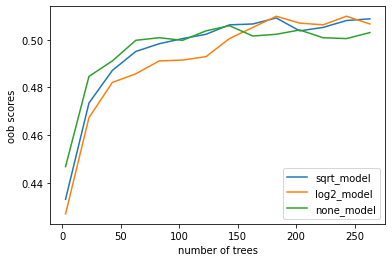

In [8]:
for score, model_type in zip((sqrt_oob, log2_oob, none_oob),
                             ("sqrt_model", "log2_model", "none_model")):
    n_trees = np.arange(3, 264, 20)
    plt.plot(n_trees, score, label=model_type)
plt.xlabel("number of trees")
plt.ylabel("oob scores")
plt.legend()
plt.show()

It looks like the sqrt model has the best generalizatoin score, as it is the most consistent, is mainly the best scores, and also ending off with the highest score.

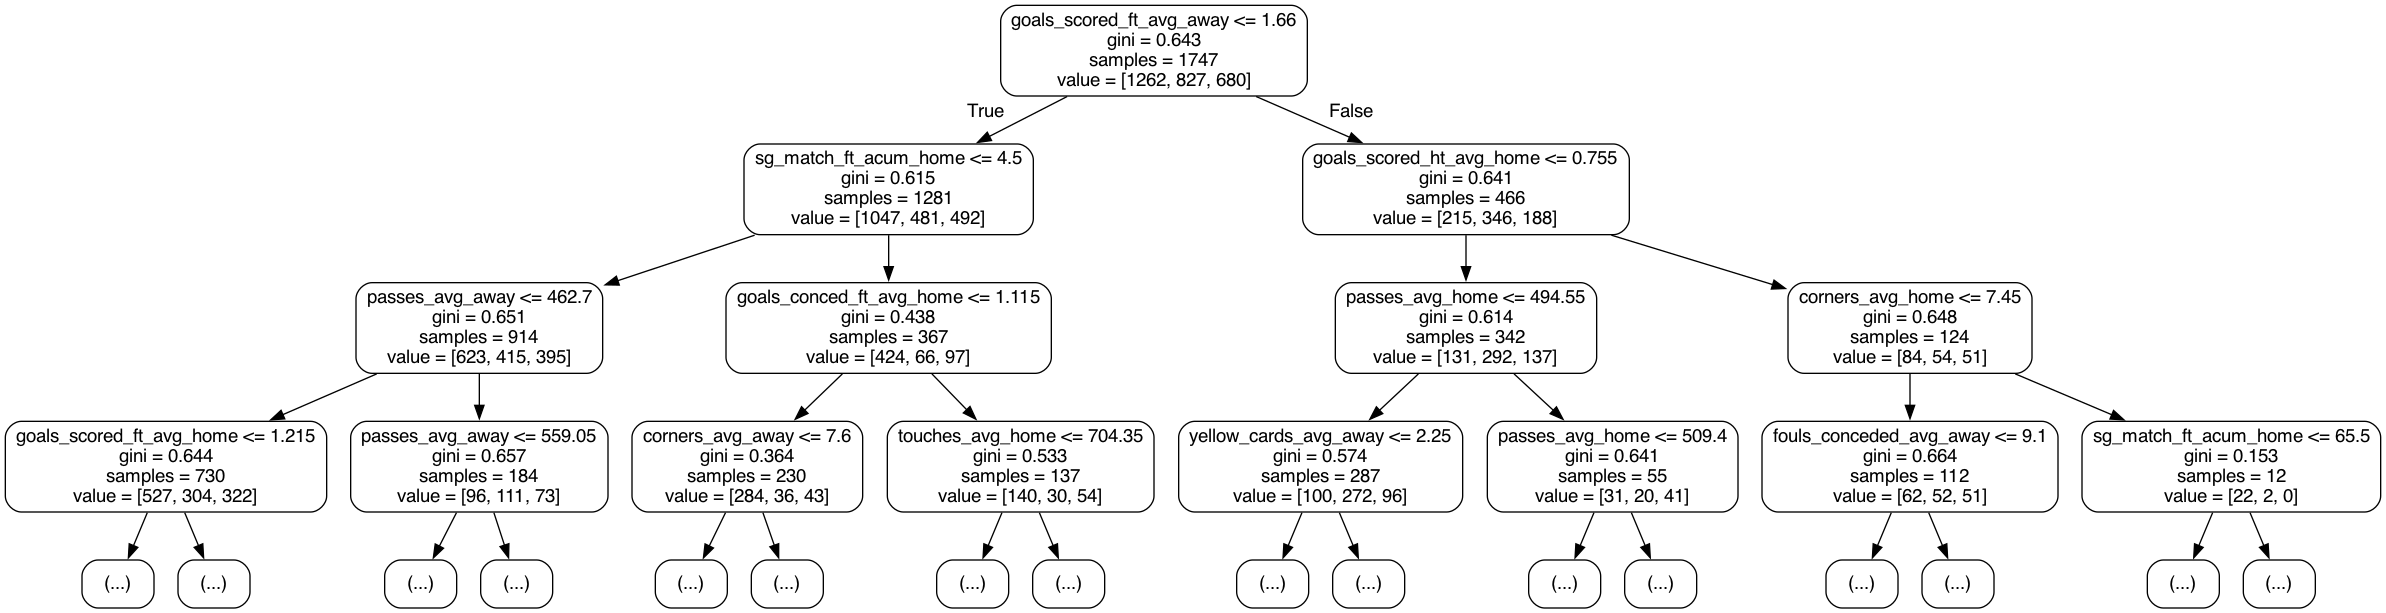

In [9]:
best_model = sqrt_model[np.argmax(sqrt_oob)]
ypred = best_model.predict(Xtest)
accuracy1 = accuracy_score(ytest, ypred)
conf_matrix = confusion_matrix(ytest, ypred)

tree = best_model.estimators_[0]

dot_data = export_graphviz(tree, out_file=None, 
                           rounded = True,
                           max_depth=3,
                           feature_names=X.columns.tolist())  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())


In [10]:
print("Accuracy score:",accuracy1)

Accuracy score: 0.5151515151515151


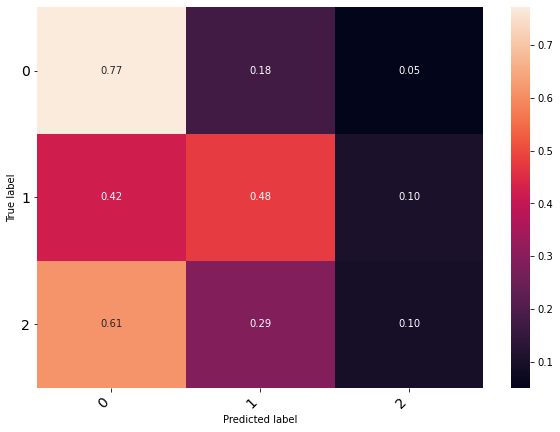

In [11]:
# conf_matrix

confusion_matrix_rf = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(confusion_matrix_rf, index=['0', '1', '2'], columns=['0', '1', '2'])

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,  ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

**Written Answer:** This model is not that great but not that bad, as it has a 51% accuracy model but there are 9 possible classifications. it is not very good at predicting ties, and most of its predictions are for wins, which makes sense since it is the most common, but it is proportionally too much.

### Q2.2 - <span style="color:red">[9]</span> - What are the 5 most important variables for the best (previous) model? Create a barplot reporting their importance scores based on Gini impurity.

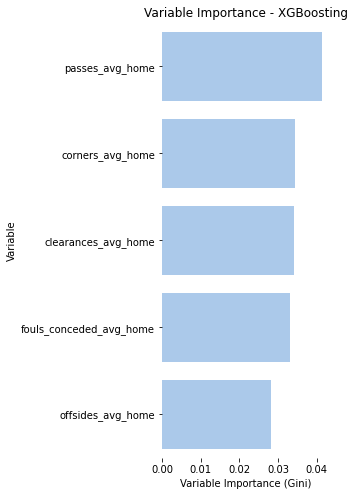

In [12]:
# Get 5 most important variables
importances = best_model.feature_importances_[:5]
indices = np.argsort(importances)[::-1] [:5]

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - XGBoosting")
sns.set_color_codes("pastel")
sns.barplot(x=importances[indices], y=X.columns[indices], label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Gini)")
sns.despine(left=True, bottom=True)

### Q3.1 - <span style="color:red">[20]</span> - XGBoosting
Now we'll repeat the process for the XGB model, using an [```XGBClassifier``` object](https://xgboost.readthedocs.io/en/latest/python/python_api.html).

1. Use cross-validated grid search (with 5 stratified validation sets) to find the best values from the lists below for `XGBClassifier`. Use only 40% of the training set for your search, otherwise it will take a long time. Take advantage of `n_jobs=-1`. Report the optimal values found per argument.
 - Number of trees: [25, 50, 100]
 - Maximum depth: [8, 25, 42]
 - Learning rate: [0.1, 0.5, 0.9]
 
2. Train a `XGBClassifier` using the optimal values and report its accuracy as well as the confusion matrix. Store the accuracy in a variable called **accuracy2**.
3. Compare the confusion matrix and the accuracy of this model with the previous one. Is the performance of XGBoost better than the RandomForestClassifier in this case?

**Points will be deducted if your answer is not in the variable mentioned above.**

**Use random_state = seed in all the methods that take this argument.**

In [13]:
# Define the parameters. Play with this grid!
param_grid = dict({'n_estimators'  : [25, 50, 100],
                   'max_depth'     : [8, 25, 42],
                   'learning_rate' : [0.1, 0.5, 0.9]
                  })

val_train = Xtrain.sample(frac = 0.4, #use only 40%
                          random_state = seed)

cv_object = StratifiedKFold(n_splits=5) #use 5 splits

xgb_model = XGBClassifier(random_state=seed,
                          n_jobs=-1, )

GridXGB = GridSearchCV(xgb_model,      
                       param_grid,         
                       cv = cv_object,      
                       n_jobs = -1,         
                      )

GridXGB.fit(val_train, ytrain.loc[val_train.index])

best_xgb_model = XGBClassifier(random_state=seed, n_jobs=-1, **GridXGB.best_params_)

best_xgb_model.fit(Xtrain, ytrain)
ypred = best_xgb_model.predict(Xtest)
accuracy2 = accuracy_score(ytest, ypred)
print("Confusion matrix:\n", confusion_matrix(ytest, ypred))
print("Accuracy for this model:", accuracy2)
print("Accuracy for last model:", accuracy1)

Confusion matrix:
 [[370 100  61]
 [141 163  60]
 [161  87  45]]
Accuracy for this model: 0.48653198653198654
Accuracy for last model: 0.5151515151515151


RandomForestClassifier is still more accurate than XGBoost in this case

### Q3.2 - <span style="color:red">[4]</span> - **Written question:** How would you improve the accuracy of the models? Write no more than 5 sentences.

Maybe hypertuning the parameters (number of trees, maximum depth, learning rate). Expanding the amount of data, so maybe include soccer stats from other leagues as well.

### Q3.3 - <span style="color:red">[9]</span> - What are the 5 most important variables for the XGB classifier? Create a barplot reporting their importance scores based on Gini impurity.

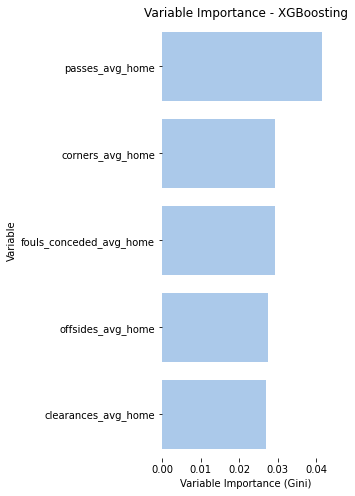

In [14]:
# Get 5 most important variables
importances = best_xgb_model.feature_importances_[:5]
indices = np.argsort(importances)[::-1] [:5]

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - XGBoosting")
sns.set_color_codes("pastel")
sns.barplot(x=importances[indices], y=X.columns[indices], label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Gini)")
sns.despine(left=True, bottom=True)